# Credit card default prediction

#### Dataset source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

### Problem statement
#### Business Objective
Estimate the probability that a credit card client will default on their payment in the next month, enabling risk teams to make decisions such as adjusting credit limits, prioritizing collections, or setting monitoring strategies to reduce expected loss.

##### Target Variable
The target variable is "**default.payment.next.month**", which indicates whether a client will default on their credit card payment in the next month. It is a binary variable where 1 indicates default and 0 indicates no default.

##### Input data
- **Dataset size**: 30,000 clients from a Taiwanese bank (UCI/Kaggle dataset).
- **Features**:  23, excluding ID and target variable.
1. **Client demographics** (SEX, EDUCATION, MARRIAGE, AGE).
    - **SEX**: 1 = Male, 2 = Female
    - **EDUCATION**: 1 = Graduate School, 2 = University, 3 = High School, 4 = Others
    - **MARRIAGE**: 1 = Married, 2 = Single, 3 = Others
2. **Financial standing** (LIMIT_BAL).
3. **History of past payments** (PAY_0, PAY_2 to PAY_6). The repayment status is on a scale from -2 to 9, where:
    - -2: No consumption
    - -1: Paid in full
    - 0: The use of revolving credit (paid minimum due)
    - 1-9: Payment delay for 1-9 months or more
4. **Bill statement amounts** (BILL_AMT1 to BILL_AMT6).
5. **Previous payment amounts** (PAY_AMT1 to PAY_AMT6).

##### Output
Calibrated probability of default within the next month per client.







#### Data understanding
To understand the dataset, I would take the following steps:

- **Load the data**: Read the UCI_Credit_Card.csv file into a pandas DataFrame.
- **Initial Exploration**: Examine the first few rows, column names, and data types.
- **Descriptive Statistics**: Generate summary statistics for numerical columns to understand their distribution (e.g., mean, median, min, max).
- **Meaningful names** for columns
- **Missing Values**: Check for missing values in each column to identify data quality issues.
- **Target Variable Analysis**: Analyze the distribution of the 'default.payment.next.month' column to spot outliers or skewness.
- **Feature Analysis**:
1. **For categorical features**, I'll examine the unique values and their frequencies.
2. **For numerical features**, I'll look at their distributions using histograms.
- **Correlation Analysis**: Investigate relationships between features and the target variable, 'default.payment.next.month'.

In [22]:
from turtledemo.sorting_animate import randomize

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/UCI_Credit_Card.csv')
# Examine the first few rows, column names, and data types
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [23]:
# Examine column names, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [24]:
# Total number of rows and columns
data.shape

(30000, 25)

In [25]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [26]:
# Rename columns to be more descriptive
data.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sept',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sept',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Previous_Payment_Sept',
    'PAY_AMT2': 'Previous_Payment_Aug',
    'PAY_AMT3': 'Previous_Payment_Jul',
    'PAY_AMT4': 'Previous_Payment_Jun',
    'PAY_AMT5': 'Previous_Payment_May',
    'PAY_AMT6': 'Previous_Payment_Apr',
    'default.payment.next.month': 'Default_Payment'
}, inplace=True)

# Display the first 5 rows with new column names
data.head()

,ID,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [27]:
# check datatypes
data.dtypes

ID                         int64
Credit_Limit             float64
Gender                     int64
Education                  int64
Marital_Status             int64
Age                        int64
Repayment_Status_Sept      int64
Repayment_Status_Aug       int64
Repayment_Status_Jul       int64
Repayment_Status_Jun       int64
Repayment_Status_May       int64
Repayment_Status_Apr       int64
Bill_Amount_Sept         float64
Bill_Amount_Aug          float64
Bill_Amount_Jul          float64
Bill_Amount_Jun          float64
Bill_Amount_May          float64
Bill_Amount_Apr          float64
Previous_Payment_Sept    float64
Previous_Payment_Aug     float64
Previous_Payment_Jul     float64
Previous_Payment_Jun     float64
Previous_Payment_May     float64
Previous_Payment_Apr     float64
Default_Payment            int64
dtype: object

In [28]:
# Analyze the distribution of the target variable
default_counts = data['Default_Payment'].value_counts()
print(default_counts)

Default_Payment
0    23364
1     6636
Name: count, dtype: int64


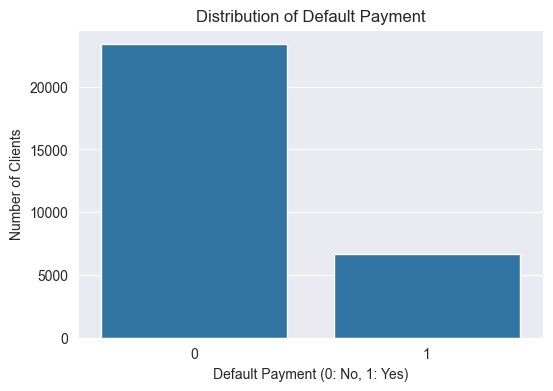

In [29]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Default_Payment', data=data)
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Number of Clients')
plt.show()

#### Data preparation
After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.
- Drop ID column as it is not needed for prediction.
- For Education, 1=graduate school, 2=university, 3=high school, 4=others. Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
- For Marital Status, 1=married, 2=single, 3=others. The value 0 is not documented and can be grouped into 'others' (3).
- Verify the unique values after cleaning.
- Save the cleaned data to a new CSV file.
- Load the cleaned data to verify.

In [30]:
# Drop the ID column as it is not needed for prediction
if 'ID' in data.columns:
    data = data.drop('ID', axis=1)

In [31]:
# The dataset description indicates that for Education, 1=graduate school, 2=university, 3=high school, 4=others.
# Values 0, 5, and 6 are not documented and can be grouped into 'others' (4).
data['Education'] = data['Education'].replace([0, 5, 6], 4)

In [32]:
# For Marital Status, 1=married, 2=single, 3=others.
# The value 0 is not documented and can be grouped into 'others' (3).
data['Marital_Status'] = data['Marital_Status'].replace(0, 3)

In [33]:
# Verify the unique values after cleaning
print("Unique values in 'Education' after cleaning:", sorted(data['Education'].unique()))
print("Unique values in 'Marital_Status' after cleaning:", sorted(data['Marital_Status'].unique()))

Unique values in 'Education' after cleaning: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Unique values in 'Marital_Status' after cleaning: [np.int64(1), np.int64(2), np.int64(3)]


In [34]:
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
# Save the cleaned data to a new CSV file
data.to_csv('data/credit_card_cleaned.csv', index=False)

print("Cleaned data saved to 'credit_card_cleaned.csv'")

Cleaned data saved to 'credit_card_cleaned.csv'


In [36]:
data = pd.read_csv('data/credit_card_cleaned.csv')
data.head()

,Credit_Limit,Gender,Education,Marital_Status,Age,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Previous_Payment_Sept,Previous_Payment_Aug,Previous_Payment_Jul,Previous_Payment_Jun,Previous_Payment_May,Previous_Payment_Apr,Default_Payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [37]:
# Total number of rows and columns
data.shape

(30000, 24)

In [38]:
# Check for missing values in each column to identify data quality issues.
data.isnull().sum()

Credit_Limit             0
Gender                   0
Education                0
Marital_Status           0
Age                      0
Repayment_Status_Sept    0
Repayment_Status_Aug     0
Repayment_Status_Jul     0
Repayment_Status_Jun     0
Repayment_Status_May     0
Repayment_Status_Apr     0
Bill_Amount_Sept         0
Bill_Amount_Aug          0
Bill_Amount_Jul          0
Bill_Amount_Jun          0
Bill_Amount_May          0
Bill_Amount_Apr          0
Previous_Payment_Sept    0
Previous_Payment_Aug     0
Previous_Payment_Jul     0
Previous_Payment_Jun     0
Previous_Payment_May     0
Previous_Payment_Apr     0
Default_Payment          0
dtype: int64

#### Exploratory Data Analysis (EDA)
Now that the data is cleaned, let's visualize some of the features.

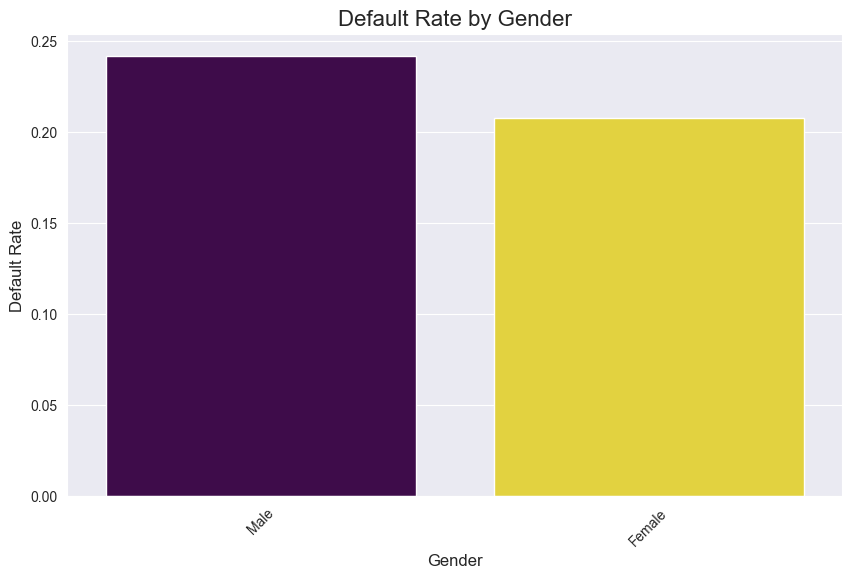

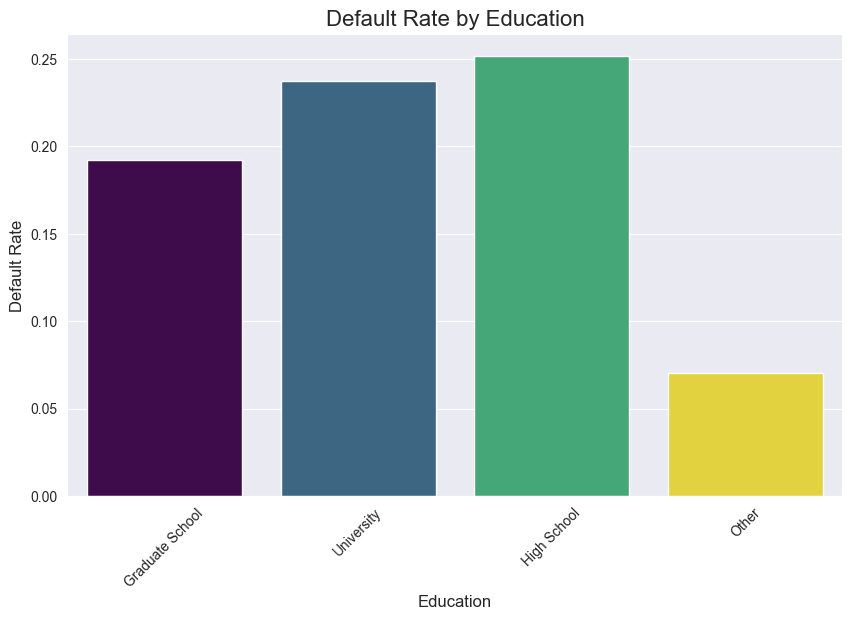

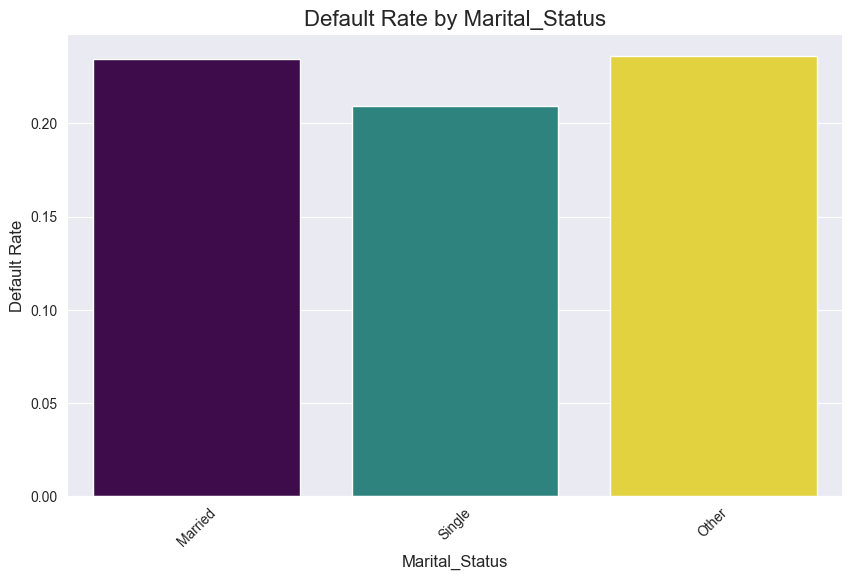

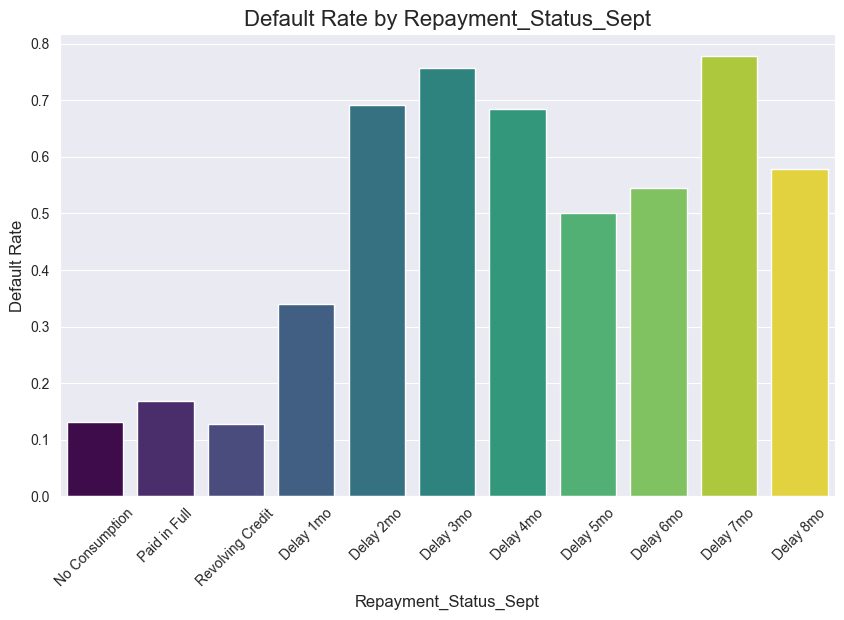

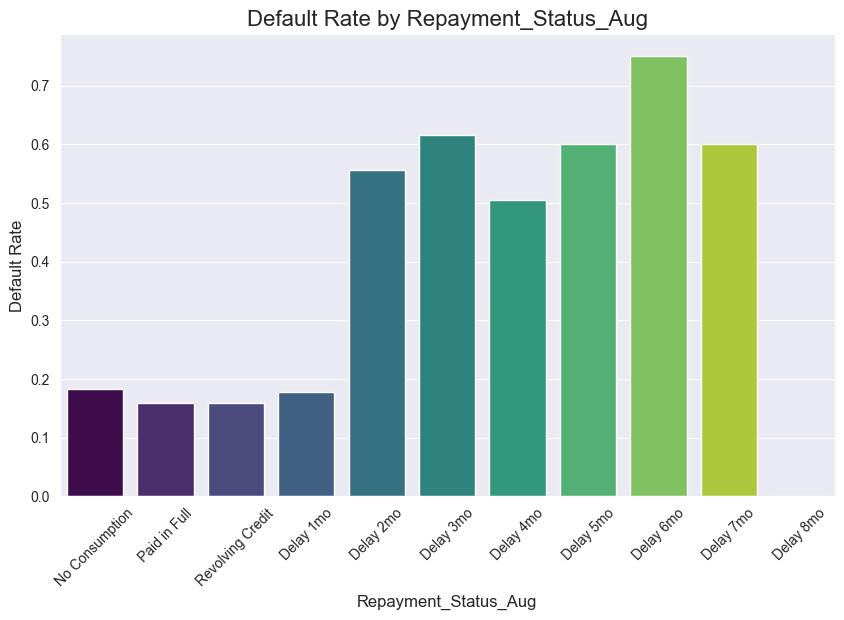

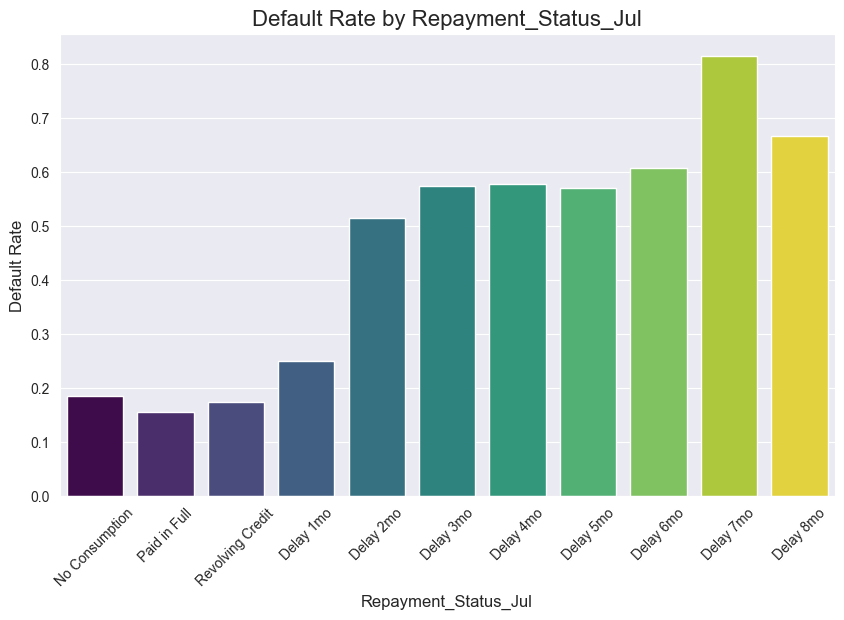

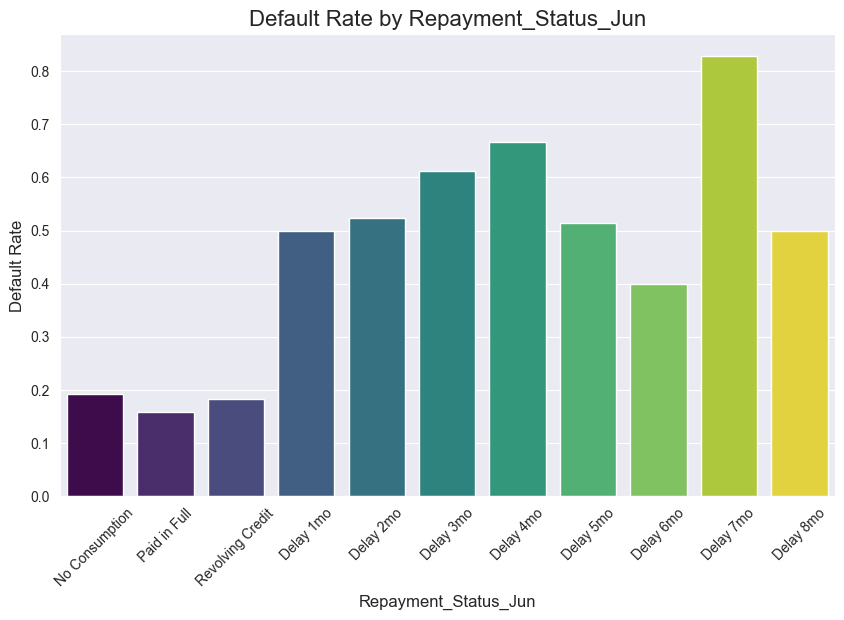

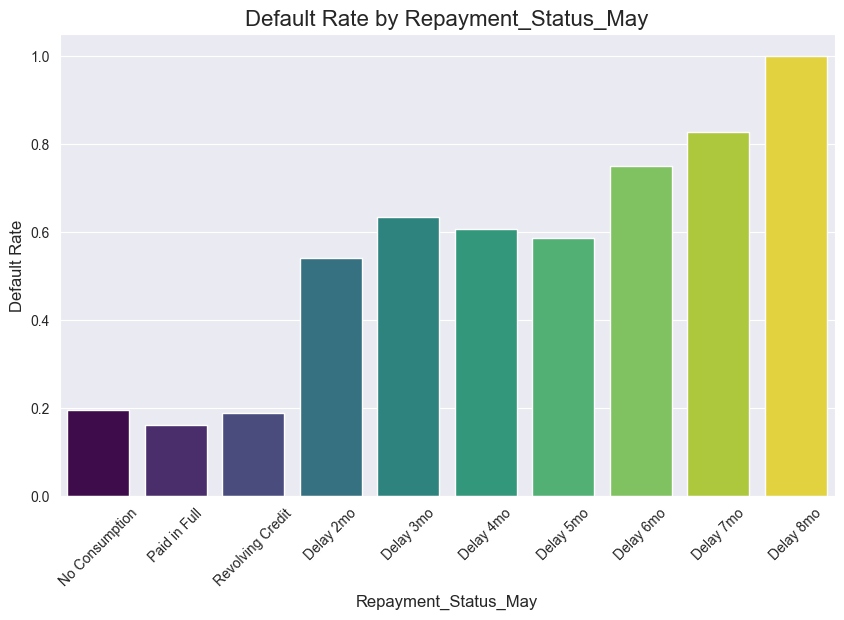

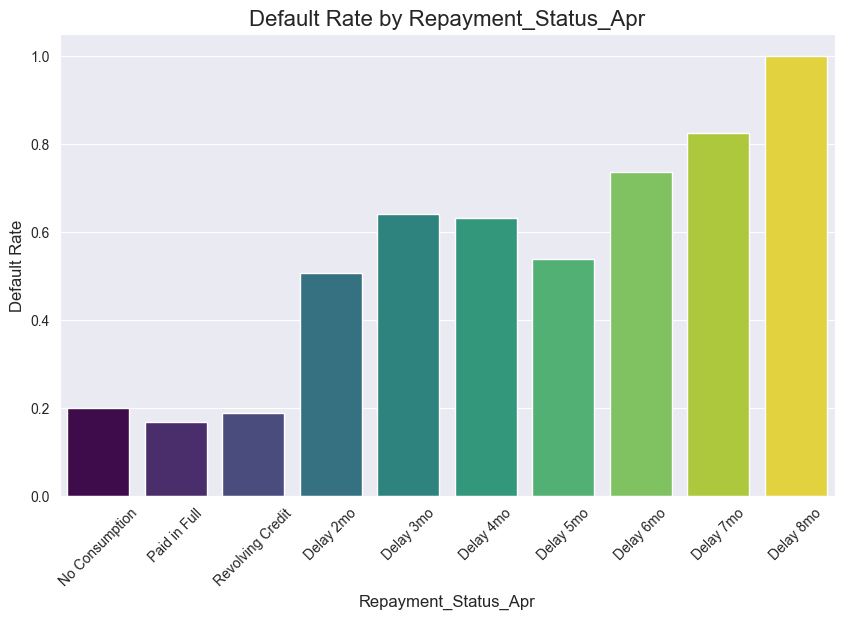

In [39]:
# Bar plots for categorical features vs. Default_Payment

# Define mappings for categorical features
gender_map = {1: 'Male', 2: 'Female'}
education_map = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Other'}
marital_map = {1: 'Married', 2: 'Single', 3: 'Other'}
repayment_map = {
    -2: 'No Consumption', -1: 'Paid in Full', 0: 'Revolving Credit', 1: 'Delay 1mo',
    2: 'Delay 2mo', 3: 'Delay 3mo', 4: 'Delay 4mo', 5: 'Delay 5mo',
    6: 'Delay 6mo', 7: 'Delay 7mo', 8: 'Delay 8mo', 9: 'Delay >8mo'
}

# Define categorical features
categorical_features = ['Gender', 'Education', 'Marital_Status'] + [col for col in data.columns if 'Repayment_Status' in col]

# Plotting
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Group by the feature and calculate the mean of Default_Payment (which is the default rate)
    default_rate = data.groupby(feature, observed=False)['Default_Payment'].mean()

    # Create a bar plot
    ax = sns.barplot(x=default_rate.index, y=default_rate.values, hue=default_rate.index, palette='viridis', legend=False)

    # Get current ticks and then set them with labels
    ticks = ax.get_xticks()

    # Set text labels for x-axis
    if feature == 'Gender':
        ax.set_xticks(ticks)
        ax.set_xticklabels([gender_map.get(x, x) for x in default_rate.index])
    elif feature == 'Education':
        ax.set_xticks(ticks)
        ax.set_xticklabels([education_map.get(x, x) for x in default_rate.index])
    elif feature == 'Marital_Status':
        ax.set_xticks(ticks)
        ax.set_xticklabels([marital_map.get(x, x) for x in default_rate.index])
    elif 'Repayment_Status' in feature:
        ax.set_xticks(ticks)
        ax.set_xticklabels([repayment_map.get(x, x) for x in default_rate.index])

    # Add labels and title
    plt.title(f'Default Rate by {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

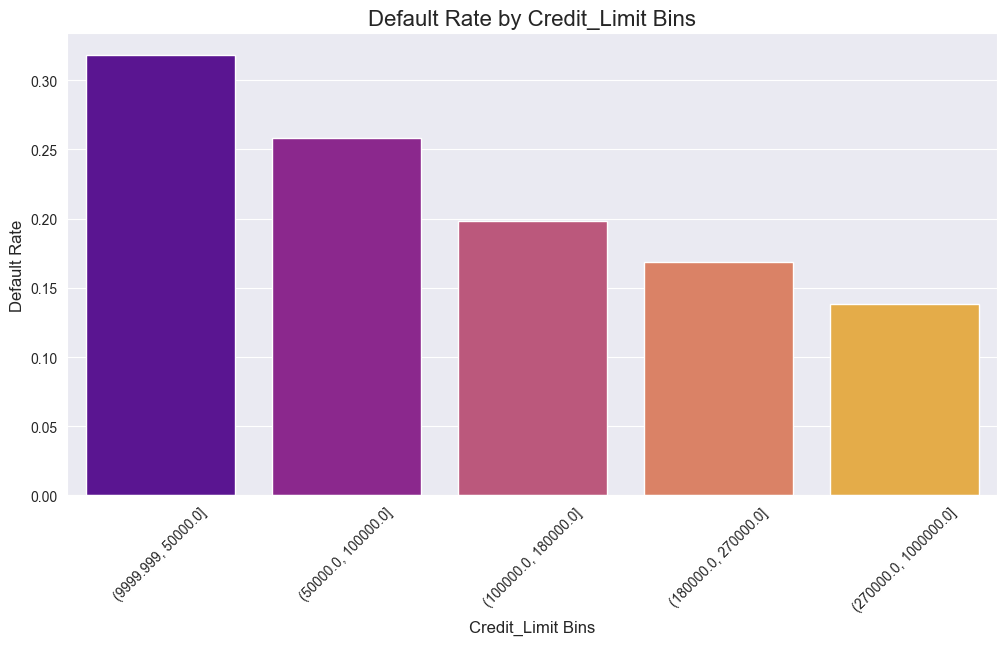

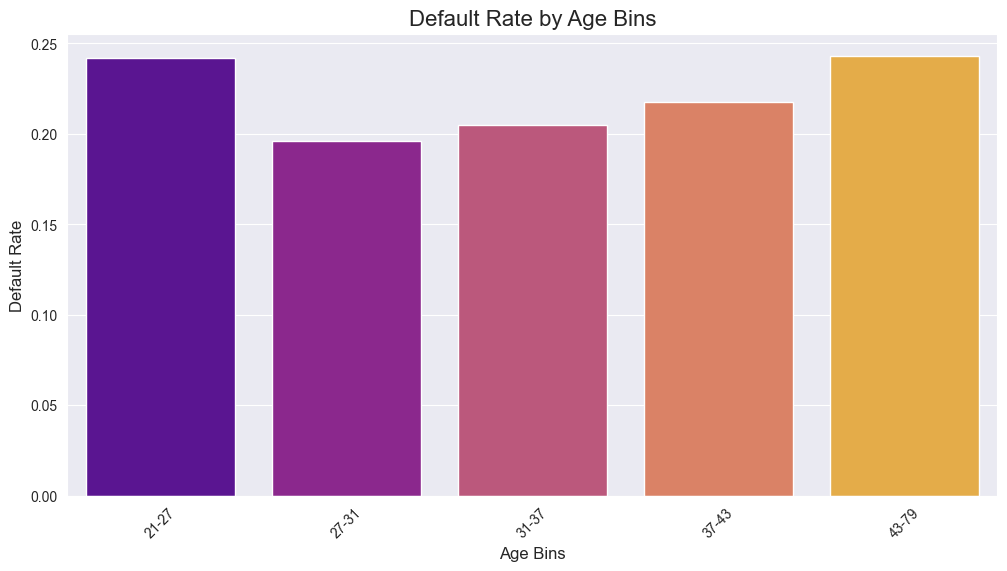

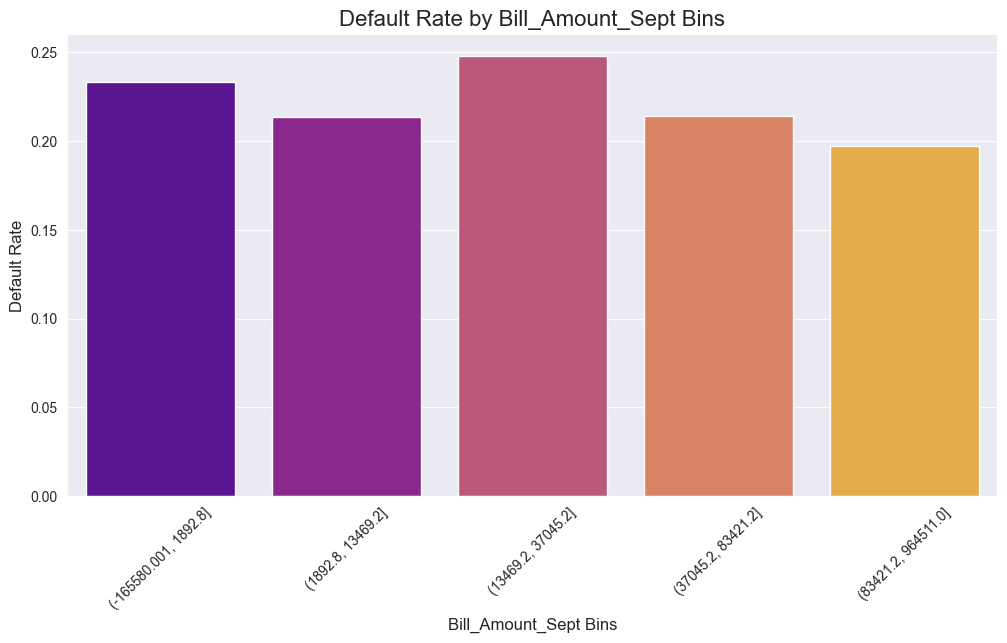

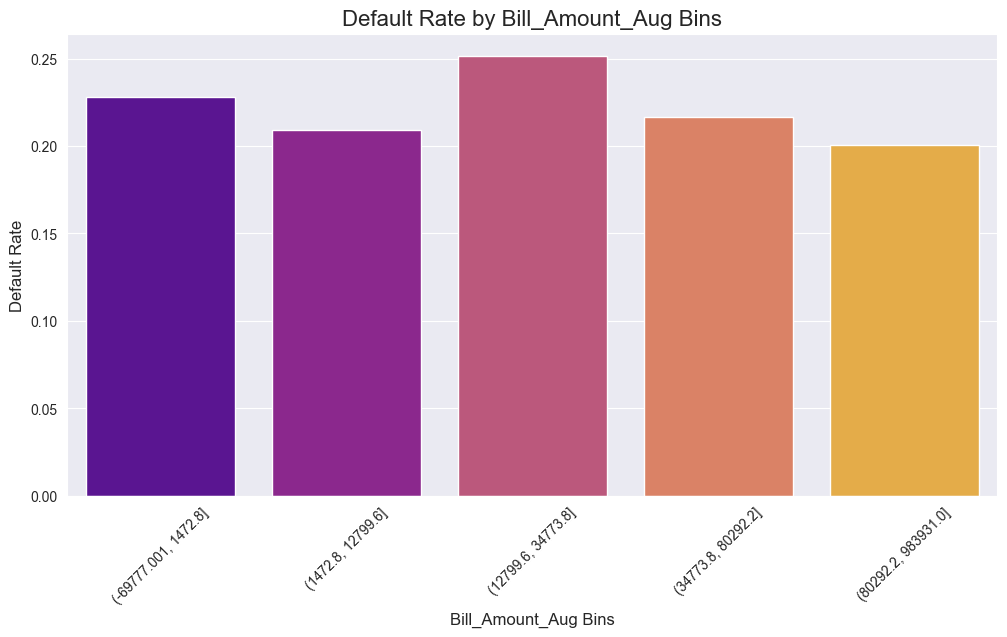

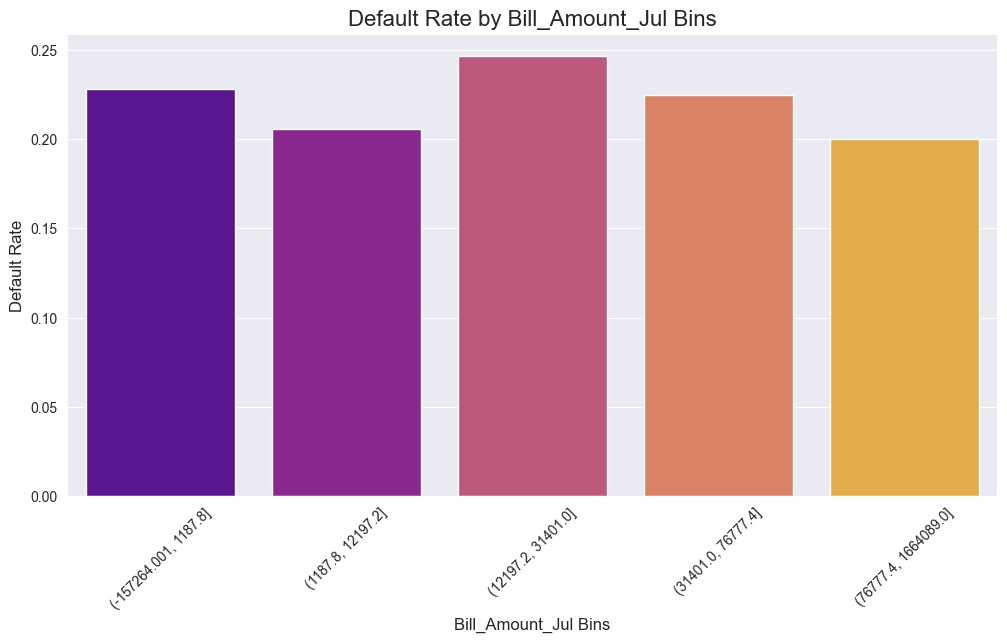

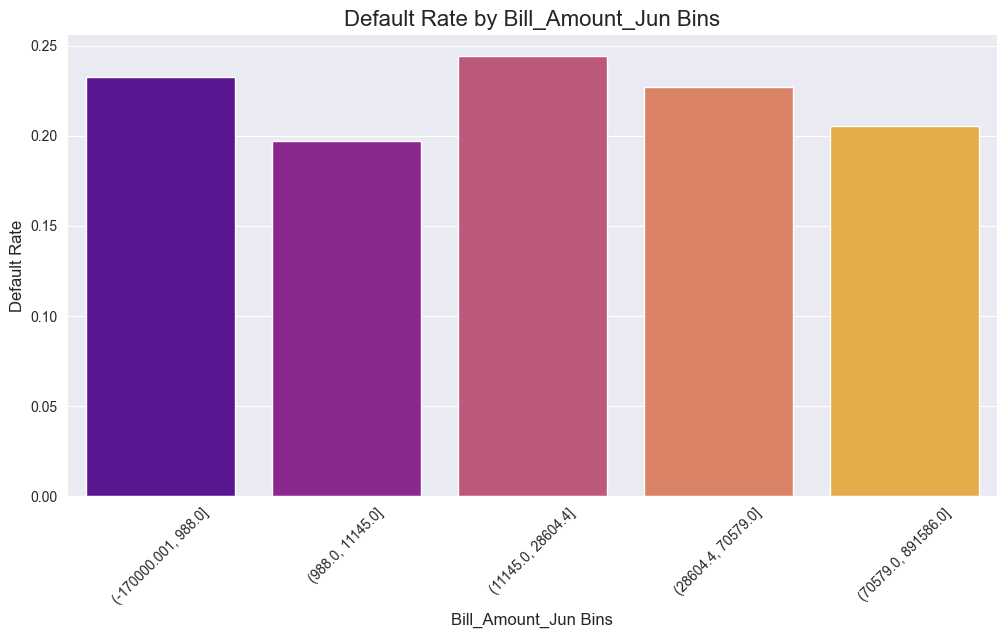

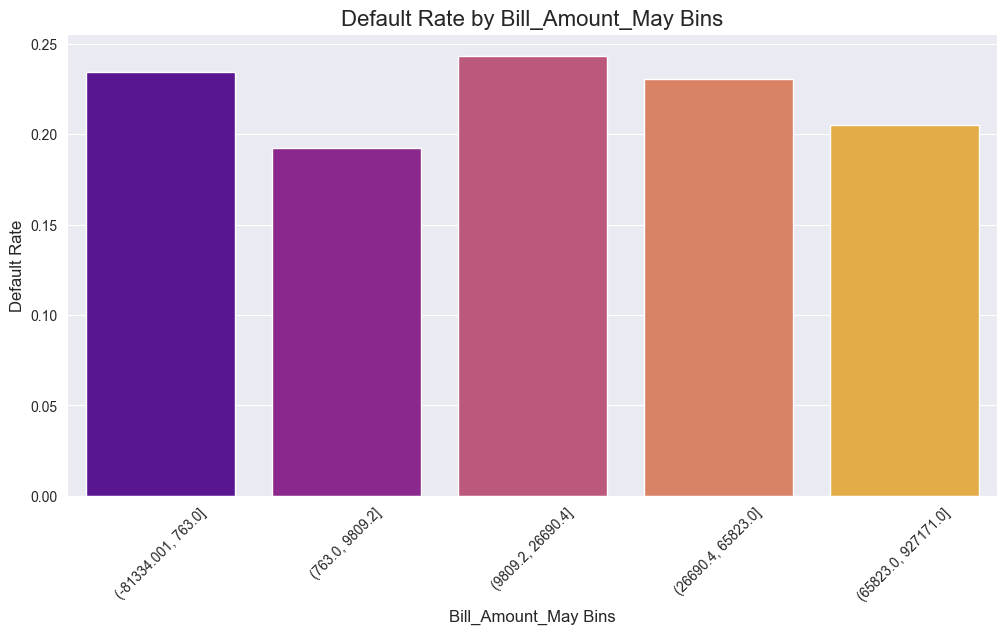

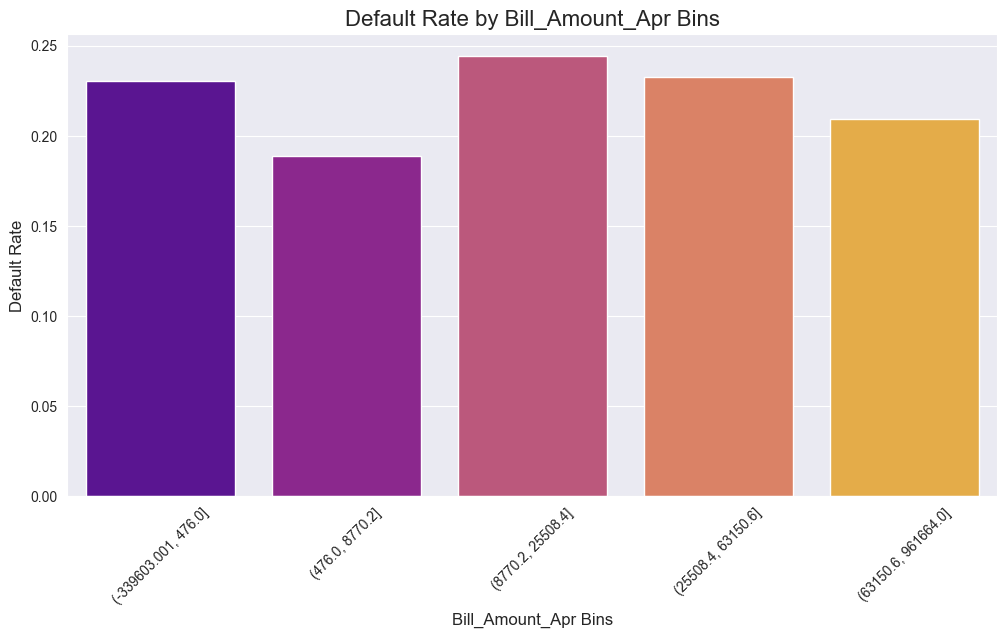

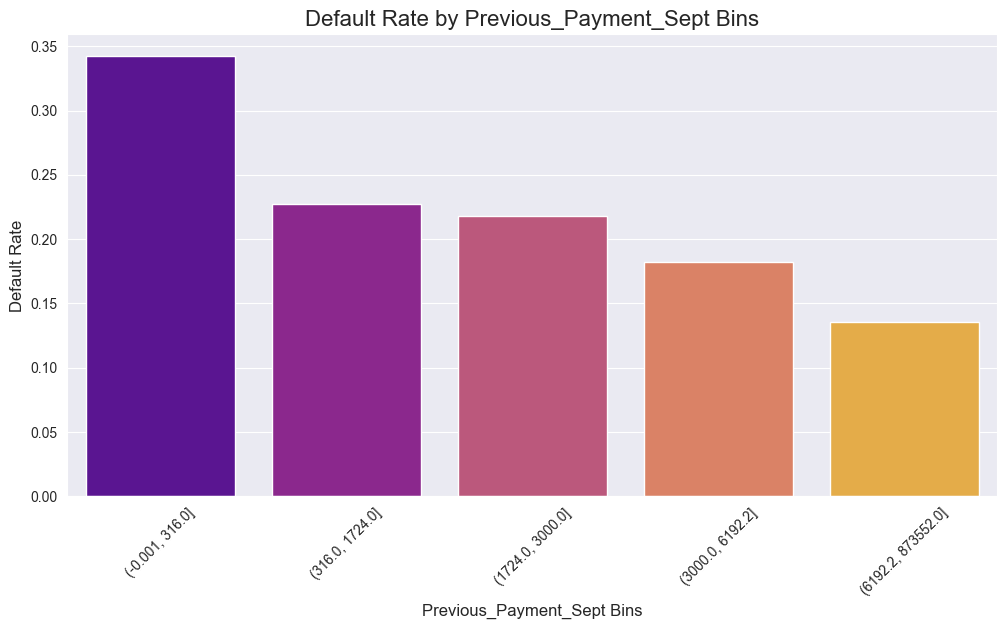

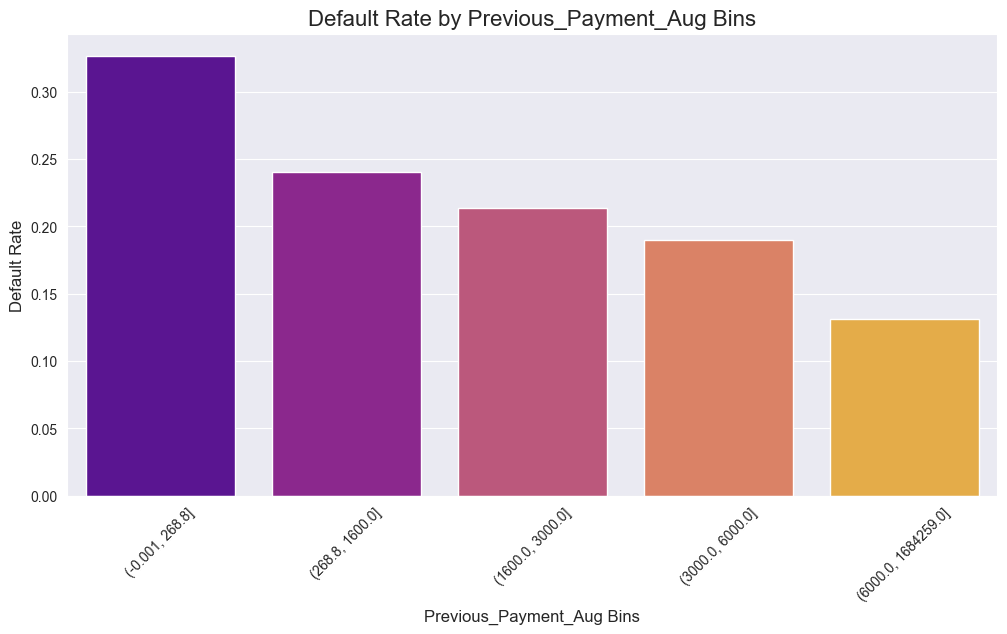

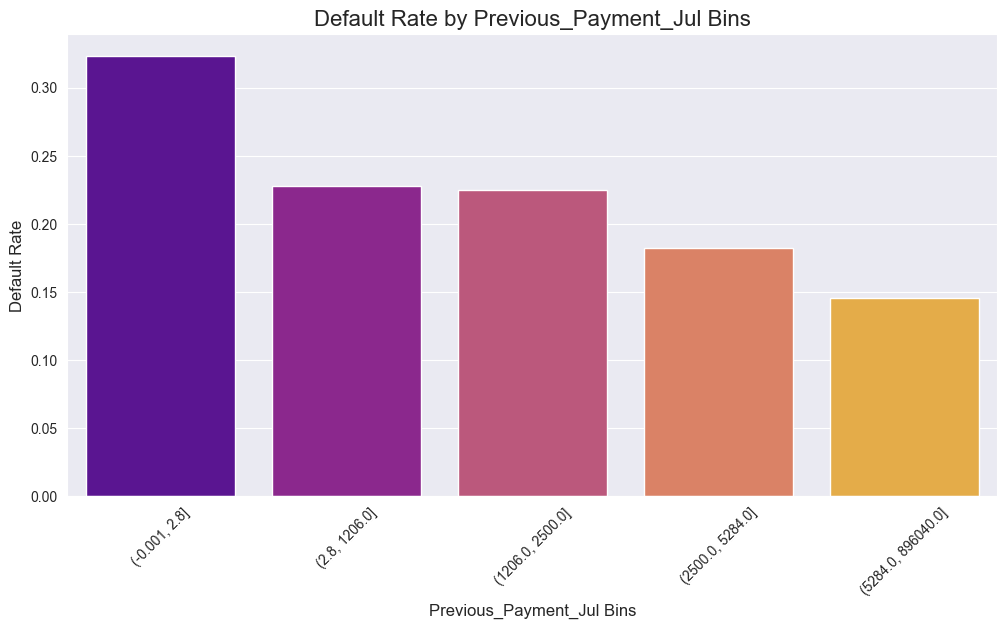

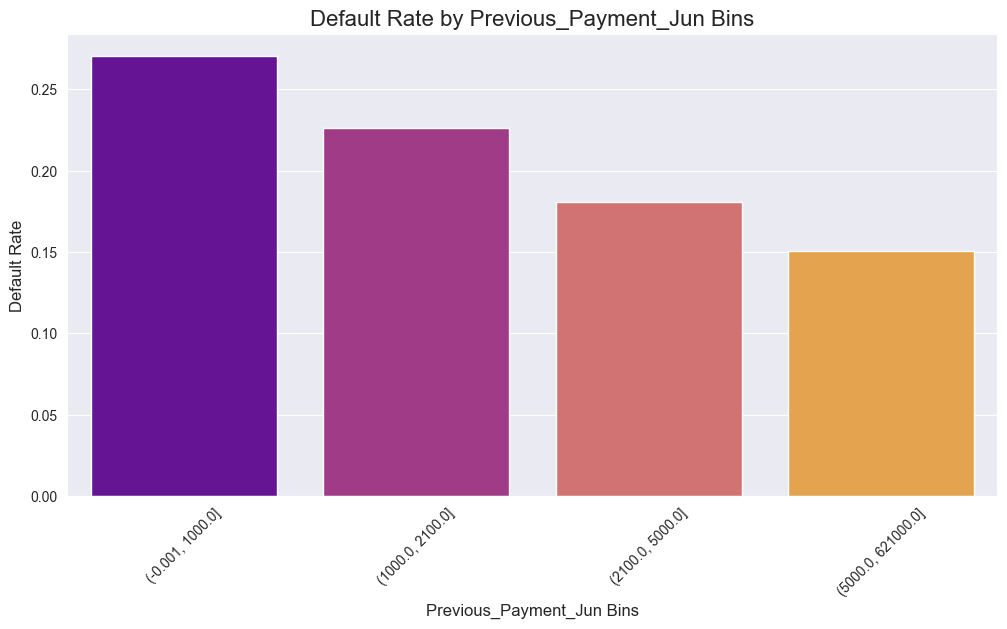

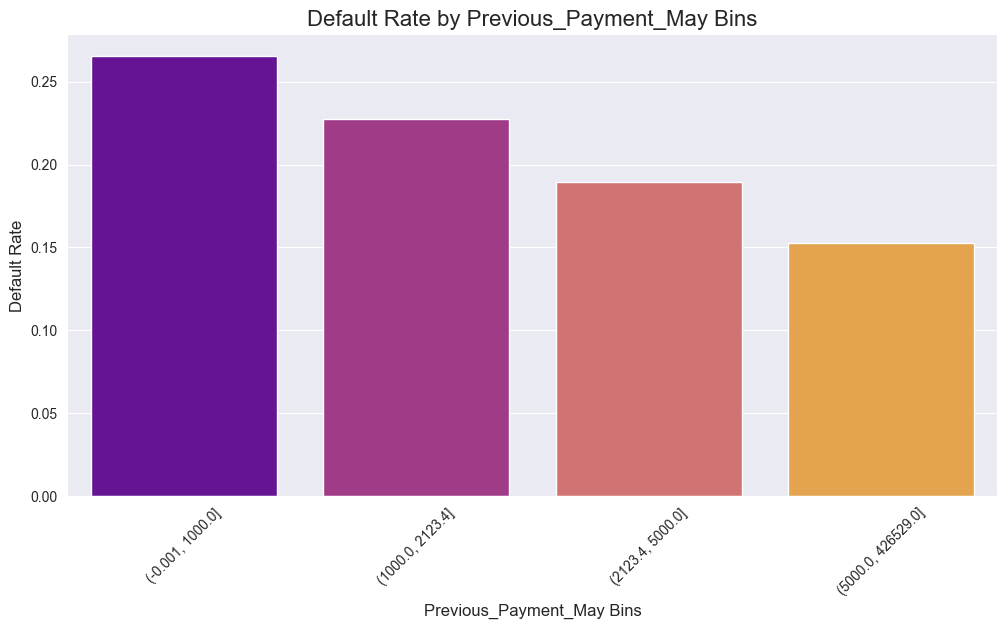

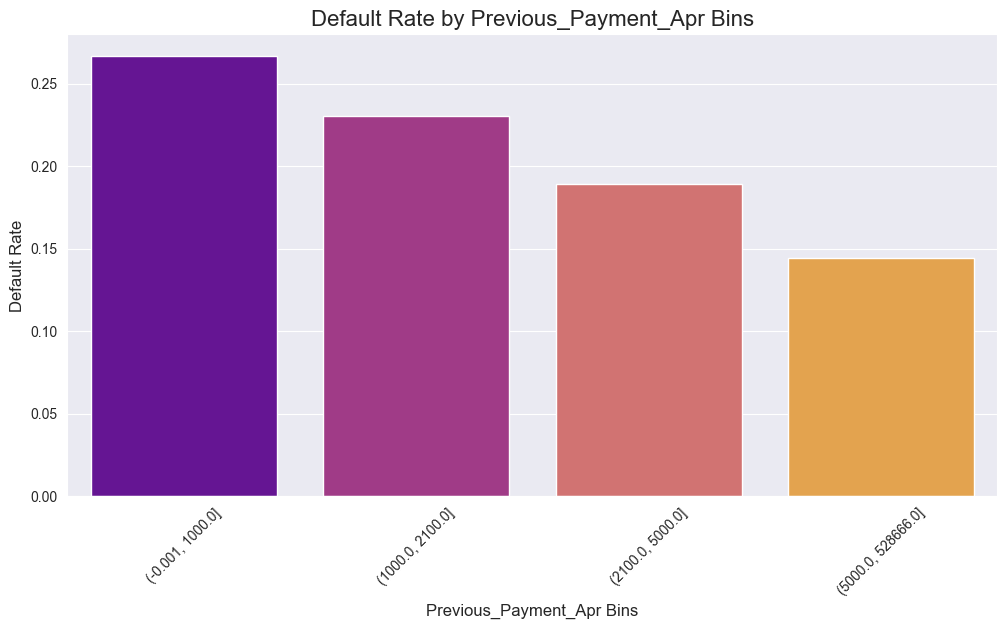

In [40]:
# Bar plots for numerical features vs. Default_Payment

# Define numerical features
numerical_features = ['Credit_Limit', 'Age'] + [col for col in data.columns if 'Bill_Amount' in col or 'Previous_Payment' in col]

# Plotting
for feature in numerical_features:
    plt.figure(figsize=(12, 6))

    # For features with many unique values, it's better to bin them first
    # We'll use qcut for features that might be skewed, like bill and payment amounts, to get equal-sized groups
    if data[feature].nunique() > 20:
        try:
            # Use qcut to create bins with equal number of observations
            binned_feature = pd.qcut(data[feature], q=5, duplicates='drop')
            plot_data = data.groupby(binned_feature, observed=False)['Default_Payment'].mean()
        except ValueError:
            # If qcut fails (e.g., due to non-unique bin edges), use cut
            binned_feature = pd.cut(data[feature], bins=5)
            plot_data = data.groupby(binned_feature, observed=False)['Default_Payment'].mean()
    else:
        plot_data = data.groupby(feature, observed=False)['Default_Payment'].mean()

    # Create a bar plot
    ax = sns.barplot(x=plot_data.index.astype(str), y=plot_data.values, hue=plot_data.index.astype(str), palette='plasma', legend=False)

    # Custom labels for Age bins
    if feature == 'Age' and isinstance(plot_data.index, pd.CategoricalIndex):
        ticks = ax.get_xticks()
        labels = [f'{int(round(interval.left))}-{int(round(interval.right))}' for interval in plot_data.index]
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels)

    # Add labels and title
    plt.title(f'Default Rate by {feature} Bins', fontsize=16)
    plt.xlabel(f'{feature} Bins', fontsize=12)
    plt.ylabel('Default Rate', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

### Summary of Bar Plots

The bar plots reveal several key trends about the factors influencing credit card defaults:

#### Categorical Features:
- **Repayment Status**: This is clearly the most significant predictor. The default rate rises sharply as the payment delay increases from one month to two or more. Clients who pay in full or have no consumption have a very low risk of default.
- **Gender**: There is a slight difference in default rates between genders, with one gender showing a marginally higher tendency to default.
- **Education**: Default rates vary across education levels. Typically, higher levels of education (like graduate school) are associated with a lower default rate compared to lower levels (like high school).
- **Marital Status**: The default rate differs between married and single clients, with one group showing a slightly higher propensity to default.

#### Numerical Features (Binned):
- **Credit Limit**: There is a strong inverse relationship. Clients in the lowest credit limit bracket have the highest default rate, and the rate consistently decreases as the credit limit increases.
- **Age**: The default rate shows some variation across different age groups. It is often observed that younger clients might have a slightly higher default rate.
- **Bill Amounts**: The trend for bill amounts is not always linear. However, it can sometimes be seen that clients with very low or very high bill amounts relative to their credit limit have different default behaviors.
- **Previous Payments**: Similar to credit limit, there's a noticeable trend here. Clients who make smaller previous payments (relative to their bill amount) tend to have a higher default rate.

These insights are crucial for feature engineering and for understanding the final model's behavior. The repayment status, in particular, stands out as a dominant feature.


#### Modeling
Now that we have a cleaned dataset and have explored the features, we can proceed to build a predictive model. we need to focus on predicting defaults for credit card payments. First, let's re-examine the balance of our target variable to confirm the class imbalance.

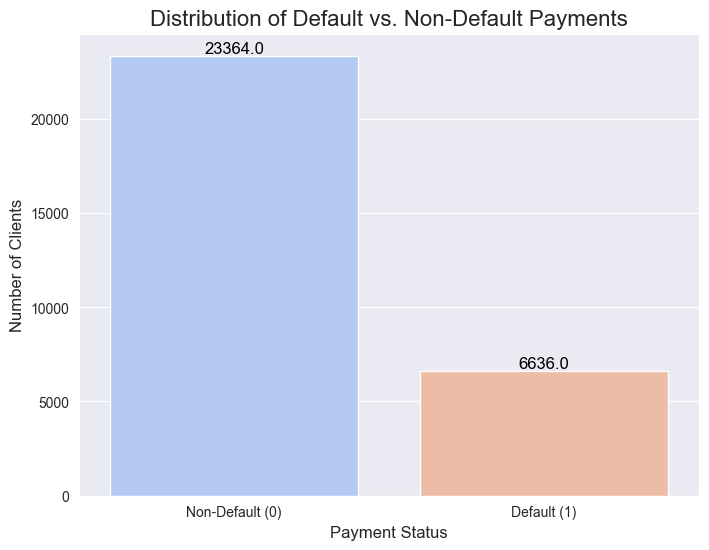

The plot clearly shows that the dataset is imbalanced, with significantly more non-defaulting clients than defaulting ones.


In [41]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Default_Payment', data=data, hue='Default_Payment', palette='coolwarm', legend=False)
plt.title('Distribution of Default vs. Non-Default Payments', fontsize=16)
plt.xlabel('Payment Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'])

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

print("The plot clearly shows that the dataset is imbalanced, with significantly more non-defaulting clients than defaulting ones.")

To handle the class imbalance, we will use the **Synthetic Minority Over-sampling TEchnique (SMOTE)**. This technique will generate new, synthetic samples for the minority class (defaults) to create a balanced dataset. This is a crucial step to prevent the model from being biased towards the majority class (non-defaults).

First, we need to split our data into features (X) and the target variable (y). Then, we will apply SMOTE to the training data.

Original training set distribution:
Default_Payment
0    18691
1     5309
Name: count, dtype: int64

Resampled training set distribution:
Default_Payment
0    18691
1    18691
Name: count, dtype: int64


/Users/joambrose/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


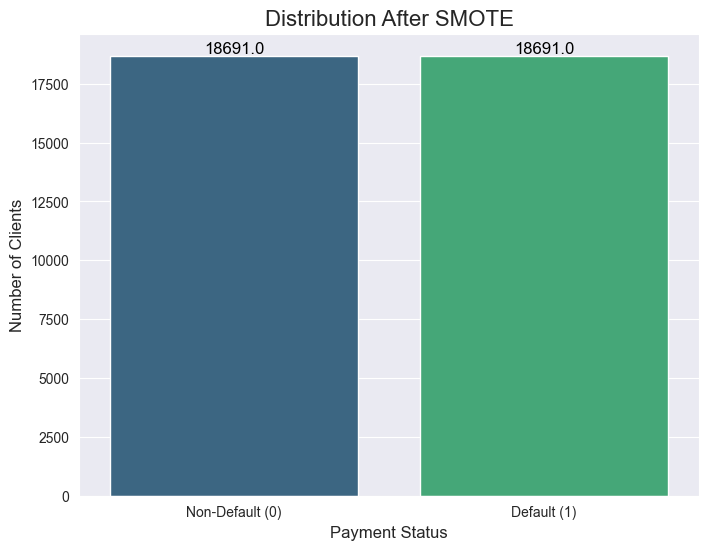

In [42]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Default_Payment', axis=1)
y = data['Default_Payment']

# Split the data into training and testing sets
# It's important to apply SMOTE only to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Original training set distribution:")
print(y_train.value_counts())
print("\nResampled training set distribution:")
print(y_train_resampled.value_counts())

# Visualize the resampled distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette='viridis', legend=False)
plt.title('Distribution After SMOTE', fontsize=16)
plt.xlabel('Payment Status', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'])

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


##### Now the data is balanced, we can proceed with modeling. We will use Logistic Regression, K-Nearest Neighbors, Decision Tree and Support Vector Machine models for training.

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scale the features
# It's important to fit the scaler on the original training data (or resampled) and transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate each model
results = {}  # Dictionary to store results for each model
confusion_matrices = {} # Dictionary to store confusion matrices

for name, model in models.items():
    print(f"--- {name} ---")

    # Note: SVM can be slow to train on this amount of data
    if name == "Support Vector Machine":
        print("Training SVM... this may take a few minutes.")

    # Train the model
    model.fit(X_train_scaled, y_train_resampled)

    # Calculate training accuracy
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the confusion matrix
    confusion_matrices[name] = cm

    # Store the metrics for class 1 (default) and training accuracy
    results[name] = report['1']
    results[name]['training_accuracy'] = train_accuracy

    # Display results
    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 8) + "\n")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results).T
results_df

--- Logistic Regression ---

Training Accuracy: 0.7244

Confusion Matrix:
[[3368 1305]
 [ 556  771]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000

---------------------------

--- K-Nearest Neighbors ---

Training Accuracy: 0.8440

Confusion Matrix:
[[3459 1214]
 [ 578  749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      4673
           1       0.38      0.56      0.46      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.70      0.72      6000

---------------------------

--- Decision Tree ---

Training Accura

,precision,recall,f1-score,support,training_accuracy
Logistic Regression,0.371387,0.581010,0.453130,1327.0,0.724359
K-Nearest Neighbors,0.381559,0.564431,0.455319,1327.0,0.843962
Decision Tree,0.334965,0.464205,0.389135,1327.0,0.999411
Support Vector Machine,0.438169,0.555388,0.489864,1327.0,0.777968


### Model Comparison
To better visualize the performance of each model, let's create a bar plot that compares the key metrics (Precision, Recall, and F1-Score) for the 'Default' class across all models.

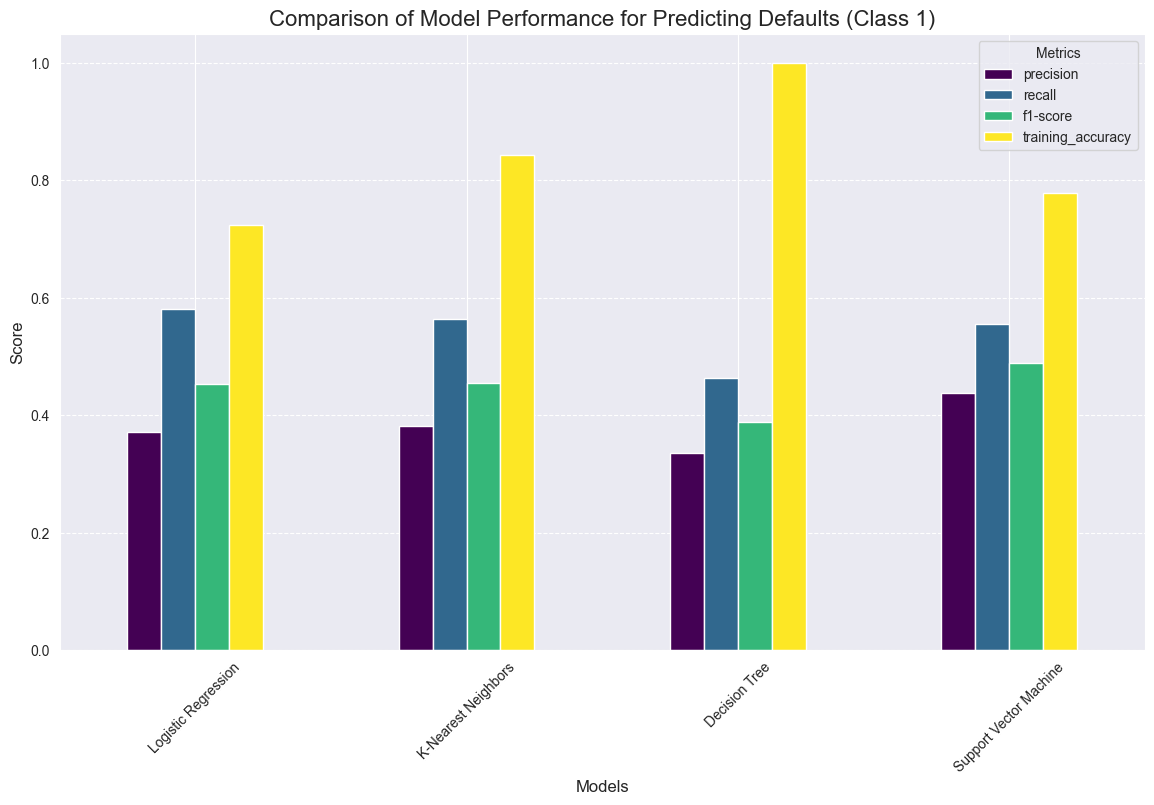

In [44]:
# Convert results to a DataFrame for easy plotting
results_df = pd.DataFrame(results).T.drop(columns='support') # Drop the 'support' column as it's not needed for this plot

# Plotting the results
results_df.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Comparison of Model Performance for Predicting Defaults (Class 1)', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y', linestyle='--')
plt.show()


### Confusion Matrix Heatmaps
To get a clearer view of the performance of each model, let's visualize their confusion matrices as heatmaps. This will make it easier to see the number of true positives, true negatives, false positives, and false negatives for each model.

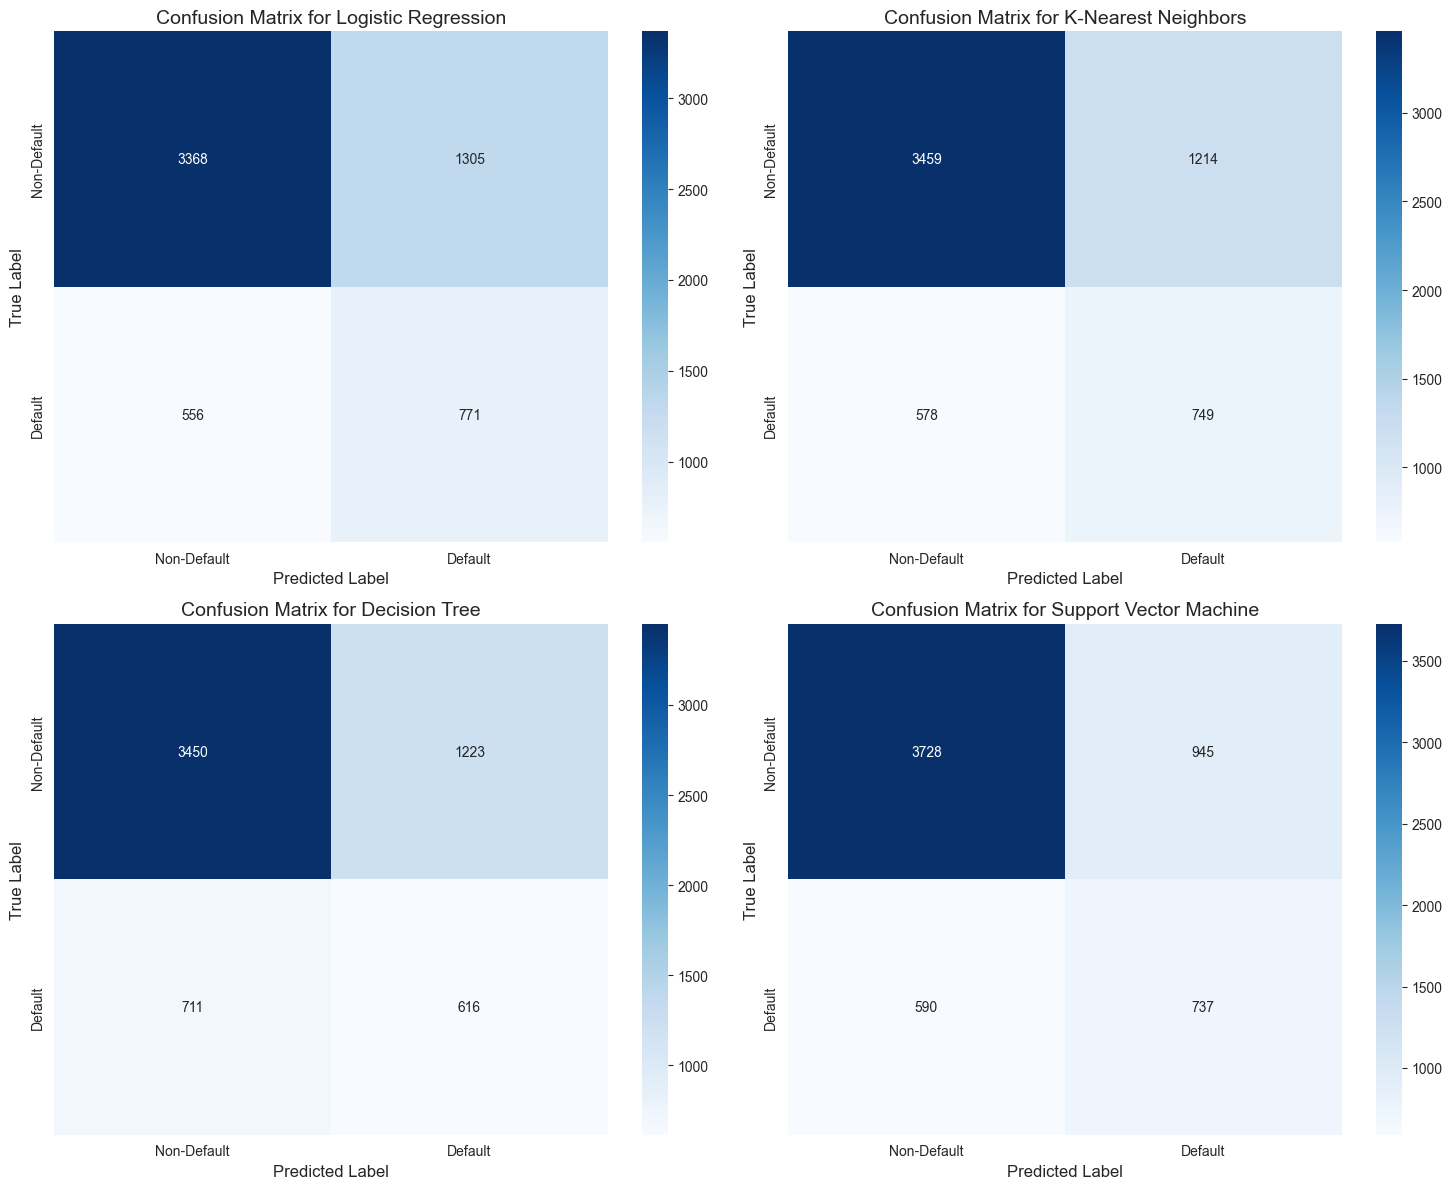

In [45]:
# Plotting confusion matrices as heatmaps
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    ax.set_title(f'Confusion Matrix for {name}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#### Summary of Model Performance
After evaluating the four models (Logistic Regression, K-Nearest Neighbors, Decision Tree,
and Support Vector Machine) on the task of predicting credit card payment defaults, we can summarize their performance as follows:

| Feature Set         | Model                  | precision | Recall | F1-score | Training accuracy | TP  | TN | FP   | FN  |
|---------------------|------------------------|-----------|--------|----------|-------------------|-----|----|------|-----|
| All Features        | Logistic Regression    | 0.37      | 0.58   | 0.45     | 0.72              | 3368 | 556| 1305 | 771|
| All Features        | K-Nearest Neighbors    | 0.38      | 0.56   | 0.45     | 0.84              | 3459 | 578 | 1214 | 749 |
| All Features        | Decision Tree          | 0.33      | 0.46   | 0.38     | 0.99              | 3450 | 711 | 1223  | 616 |
| All Features        | Support Vector Machine | 0.43      | 0.55   | 0.48     | 0.77              | 3728 | 590 | 945  | 737 |

- **Best overall**: Support Vector Machine has the highest F1-score (0.48) and precision (0.43) with solid recall (0.55). It also yields the fewest false positives (945) and the most true positives
- **Middle performers**: Logistic Regression and K-Nearest Neighbors are similar (F1 = 0.45). Logistic Regression has the highest recall (0.58) but the lowest precision (0.37), favoring catching more defaulters at the cost of more false alarms. KNN slightly improves precision (0.38) with recall at 0.56 and higher training accuracy (0.84).
- **Lowest performer**: Decision Tree has the weakest F1 (0.38), precision (0.33), and recall (0.46). Its very high training accuracy (0.99) suggests overfitting and poorer generalization.

##### The current precision/recall are modest. we need to improve precision and recall further to make the model more useful in practice. This could involve:
- Tuning hyperparameters
- Trying ensemble methods (e.g., Random Forest)
- Using dominant features selection for modeling instead of all features
- Using balanced class weights in models that support it


#### Hyperparameter Tuning with GridSearchCV for all models - All Features

In [46]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'gamma': [1, 0.1, 0.01],
        'kernel': ['rbf']
    }
}

# Store best estimators
best_estimators = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"--- Tuning {name} ---")

    # Reduce parameter grid for faster execution if needed, especially for SVM
    if name == "Support Vector Machine":
        # A smaller grid for SVM to reduce runtime
        param_grids[name] = {'C': [0.1, 1], 'gamma': [0.1, 0.01]}


    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                               cv=3, n_jobs=-1, verbose=2, scoring='f1')

    # Fit on the scaled, resampled training data
    grid_search.fit(X_train_scaled, y_train_resampled)

    # Store the best estimator
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print("-" * (len(name) + 20) + "\n")

print("Grid search complete for all models.")

--- Tuning Logistic Regression ---
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END ..............................C=1, solver=liblinear; total time=   0.1s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
---------------------------------------

--- Tuning K-Nearest Neighbors ---
Fitting 3 folds for each of

### Evaluate Tuned Models using GridSearchCV - All Features
Now, let's evaluate the performance of the tuned models on the test set.

In [47]:
# Evaluate the best estimators on the test set
tuned_results = {}
tuned_confusion_matrices = {}

for name, model in best_estimators.items():
    print(f"--- {name} (Tuned) ---")

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    tuned_results[name] = report['1']
    tuned_confusion_matrices[name] = cm

    # Display results
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 15) + "\n")

# Convert results to DataFrame for easier analysis
tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df

--- Logistic Regression (Tuned) ---

Confusion Matrix:
[[3368 1305]
 [ 556  771]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      4673
           1       0.37      0.58      0.45      1327

    accuracy                           0.69      6000
   macro avg       0.61      0.65      0.62      6000
weighted avg       0.75      0.69      0.71      6000

----------------------------------

--- K-Nearest Neighbors (Tuned) ---

Confusion Matrix:
[[3483 1190]
 [ 598  729]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      4673
           1       0.38      0.55      0.45      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.70      0.72      6000

----------------------------------

--- Decision Tree (Tuned) ---

Confusion Matrix:
[[3447 1226]


,precision,recall,f1-score,support
Logistic Regression,0.371387,0.581010,0.453130,1327.0
K-Nearest Neighbors,0.379885,0.549359,0.449168,1327.0
Decision Tree,0.335501,0.466466,0.390290,1327.0
Support Vector Machine,0.438903,0.530520,0.480382,1327.0


### Confusion Matrix Heatmaps for Tuned Models using GridSearchCV - All Features

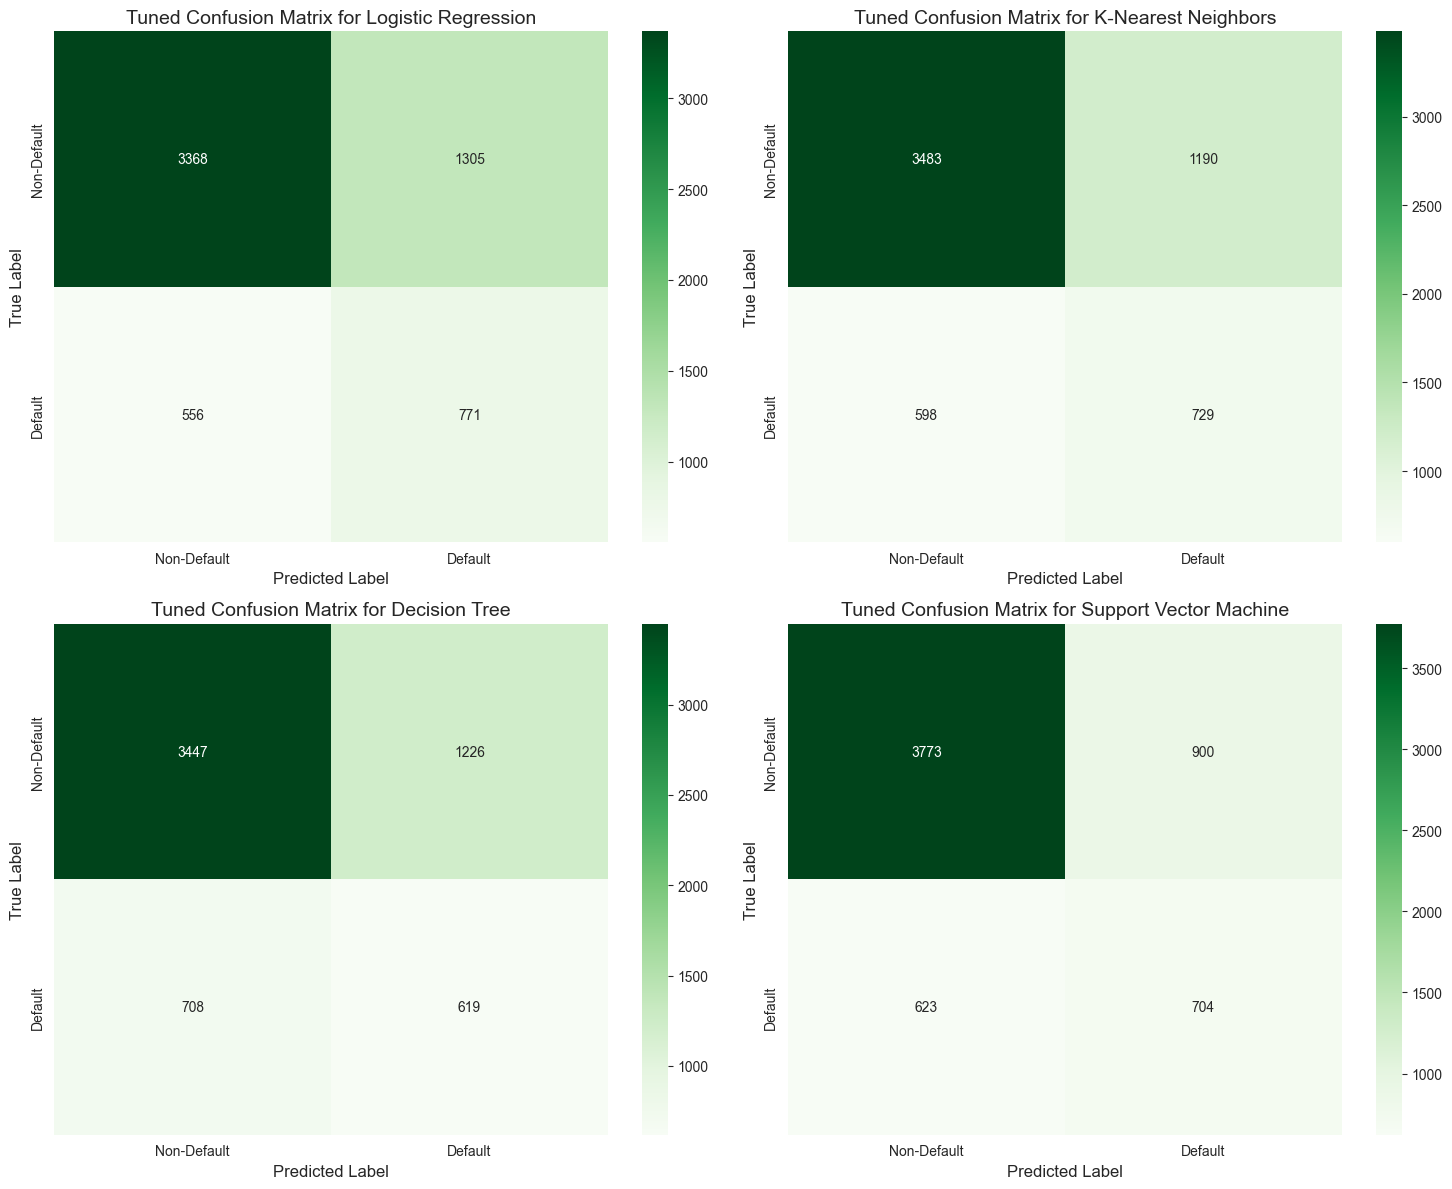

In [48]:
# Plotting confusion matrices as heatmaps for tuned models
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(tuned_confusion_matrices.items()):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
                xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
    ax.set_title(f'Tuned Confusion Matrix for {name}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Store best estimators
best_estimators = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"--- Tuning {name} ---")

    # Reduce parameter grid for faster execution if needed, especially for SVM
    if name == "Support Vector Machine":
        # A smaller grid for SVM to reduce runtime
        param_grids[name] = {'C': [0.1, 1], 'gamma': [0.1, 0.01]}


    randomize_search = RandomizedSearchCV(model, param_grids[name], n_iter=4, random_state=42)

    # Fit on the scaled, resampled training data
    randomize_search.fit(X_train_scaled, y_train_resampled)

    # Store the best estimator
    best_estimators[name] = randomize_search.best_estimator_

    print(f"Best parameters for {name}: {randomize_search.best_params_}")
    print("-" * (len(name) + 20) + "\n")

print("randomized search complete for all models.")


--- Tuning Logistic Regression ---


/Users/joambrose/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=4. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'solver': 'liblinear', 'C': 1}
---------------------------------------

--- Tuning K-Nearest Neighbors ---
Best parameters for K-Nearest Neighbors: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
---------------------------------------

--- Tuning Decision Tree ---
Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}
---------------------------------

--- Tuning Support Vector Machine ---
Best parameters for Support Vector Machine: {'gamma': 0.1, 'C': 1}
------------------------------------------

randomized search complete for all models.


In [ ]:
# Evaluate the best estimators on the test set
tuned_random_search_results = {}
tuned_random_search_confusion_matrices = {}

for name, model in best_estimators.items():
    print(f"--- {name} (Tuned) ---")

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    tuned_random_search_results[name] = report['1']
    tuned_random_search_confusion_matrices[name] = cm

    # Display results
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * (len(name) + 15) + "\n")

# Convert results to DataFrame for easier analysis
tuned_random_search_results_df = pd.DataFrame(tuned_random_search_results).T
tuned_random_search_results_df